In [28]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv('../../../data/daily-us-stocks-etfs/Stocks/aapl.us.txt')
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0


In [5]:
df.to_csv('test_save.csv', index=False)

In [6]:
pd.read_csv('test_save.csv').head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0


In [8]:
len(df)

8364

In [85]:
df = df.sort_values('Date')
train_df = df[:int(len(df)*0.9)]
test_df = df[int(len(df)*0.9):]

In [86]:
train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)

In [87]:
pd.read_csv('train.csv').head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0


In [88]:
pd.read_csv('test.csv').head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2014-07-21,89.089,89.098,87.895,88.103,41588495,0
1,2014-07-22,88.798,88.994,88.273,88.837,58640916,0
2,2014-07-23,89.490,91.798,89.256,91.151,99020557,0
3,2014-07-24,91.011,91.273,90.430,91.002,48739410,0
4,2014-07-25,90.832,91.761,90.636,91.601,46330790,0


In [89]:
test_df.shape

(837, 7)

In [90]:
len(test_df)/365

2.293150684931507

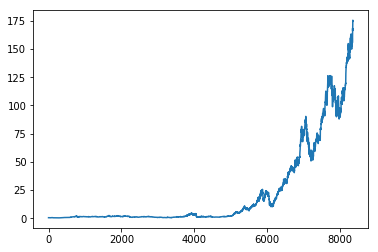

In [91]:
plt.plot(np.arange(len(df)), df['Close'])
# plt.yscale('log')
plt.show()

In [92]:
df.iloc[-1]

Date       2017-11-10
Open           175.11
High           175.38
Low            174.27
Close          174.67
Volume       25130494
OpenInt             0
Name: 8363, dtype: object

In [93]:
starting = 1000
shares = int(starting / test_df.iloc[0]['Close'])
leftover = starting - shares * test_df.iloc[0]['Close']
returns = shares * test_df.iloc[-1]['Close'] - starting + leftover
print(shares, returns)
print(returns / starting * 100)

11 952.237
95.2237


In [94]:
len(test_df)/365

2.293150684931507

In [ ]:
np.array(test_df['Close'] / test_df.iloc[0]['Close'] * starting)

0 94090.59200000002
9409.059200000002


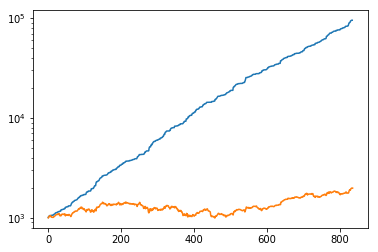

In [96]:
starting = 1000
progress = []
balance = starting 
for i in range(1, len(test_df)):
    if test_df.iloc[i]['Close'] >= test_df.iloc[i - 1]['Close']:
        shares = int(balance / test_df.iloc[i - 1]['Close'])
        balance = shares * (test_df.iloc[i]['Close'] - test_df.iloc[i - 1]['Close']) + balance
    else:
        shares = 0
    progress.append(balance)
returns = balance - starting
print(shares, returns)
print(returns / starting * 100)

plt.plot(progress)
plt.plot(np.array(test_df['Close'] / test_df.iloc[0]['Close'] * starting))
plt.yscale('log')

0 1593.2879999999955
159.32879999999955


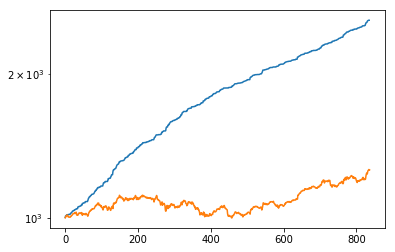

In [98]:
starting = 1000
progress = []
balance = starting 
for i in range(1, len(test_df)):
    if test_df.iloc[i]['Close'] >= test_df.iloc[i - 1]['Close']:
        shares = min(3, int(balance / test_df.iloc[i - 1]['Close']))
        balance = shares * (test_df.iloc[i]['Close'] - test_df.iloc[i - 1]['Close']) + balance
    else:
        shares = 0
    progress.append(balance)
returns = balance - starting
print(shares, returns)
print(returns / starting * 100)

plt.plot(progress)
plt.plot((np.array(test_df['Close'] - test_df.iloc[0]['Close']) * 3 + starting))
plt.yscale('log')

3201
2669
3201


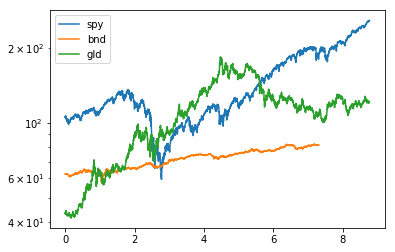

In [97]:
df1 = pd.read_csv('../../../data/daily-us-stocks-etfs/ETFs/spy.us.txt')
plt.plot(np.arange(len(df1))/365, df1['Close'], label='spy')
print(len(df1))

df1 = pd.read_csv('../../../data/daily-us-stocks-etfs/ETFs/bnd.us.txt')
plt.plot(np.arange(len(df1))/365, df1['Close'], label='bnd')
print(len(df1))

df1 = pd.read_csv('../../../data/daily-us-stocks-etfs/ETFs/gld.us.txt')
plt.plot(np.arange(len(df1))/365, df1['Close'], label='gld')
print(len(df1))
plt.yscale('log')
plt.legend()
plt.show()


2017-11-10
8364
2017-11-10
14059
2017-11-10
5153


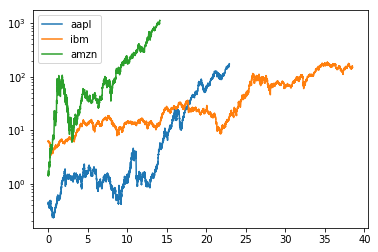

In [49]:
df1 = pd.read_csv('../../../data/daily-us-stocks-etfs/Stocks/aapl.us.txt')
plt.plot(np.arange(len(df1))/365, df1['Close'], label='aapl')
print(df1.iloc[-1]['Date'])
print(len(df1))

df1 = pd.read_csv('../../../data/daily-us-stocks-etfs/Stocks/ibm.us.txt')
plt.plot(np.arange(len(df1))/365, df1['Close'], label='ibm')
print(df1.iloc[-1]['Date'])
print(len(df1))

df1 = pd.read_csv('../../../data/daily-us-stocks-etfs/Stocks/amzn.us.txt')
plt.plot(np.arange(len(df1))/365, df1['Close'], label='amzn')
print(df1.iloc[-1]['Date'])
print(len(df1))
plt.yscale('log')
plt.legend()
plt.show()


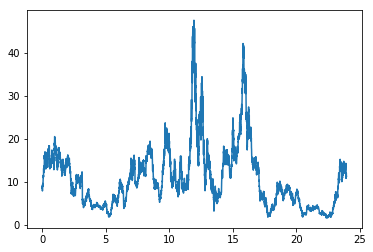

In [52]:
df1 = pd.read_csv('../../../data/daily-us-stocks-etfs/Stocks/amd.us.txt')
plt.plot(np.arange(len(df1))/365, df1['Close'])

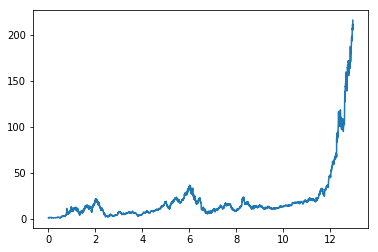

In [54]:
df1 = pd.read_csv('../../../data/daily-us-stocks-etfs/Stocks/nvda.us.txt')
plt.plot(np.arange(len(df1))/365, df1['Close'])